Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Egorov Dmitriy"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """

        return sum(self.yk[j] * self.lagrange_polynomial(j, x) for j in range(len(self.xk)))

    def lagrange_polynomial(self, j, x):
        return mult(
            (lambda xm: (x - xm) / (self.xk[j] - xm))(self.xk[m])
            for m in range(len(self.xk)) if m != j
        )


def mult(array):
    product = 1
    for i in array:
        product *= i
    return product

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


In [4]:
# YOUR CODE AND COMMENTS HERE (5 pts, manually graded)

3: 0.810891089108911
5: 0.6148307173740215
7: 0.8768773678751691
11: 4.340324479780285


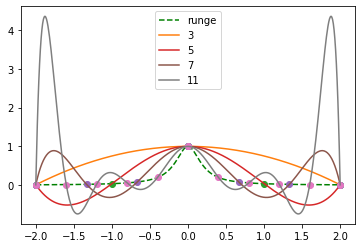

In [5]:
import matplotlib.pyplot as plt

def error(f, g, xs):
    return max(np.abs(f(xs) - g(xs)))

xs0 = np.arange(-2, 2.01, 0.01)
plt.plot(xs0, runge_func(xs0), 'g--', label="runge")

for i, m in enumerate([3, 5, 7, 11]):
    xs = np.linspace(-2, 2, m)
    ys = runge_func(xs)
    poly = LagrangeInterpolator(xs, ys)

    plt.plot(xs, ys, 'o')
    plt.plot(xs0, poly(xs0), label=f"{m}")
    plt.legend()

    print(f'{m}: {error(runge_func, poly, xs0)}')


3: 0.7837199333174566
5: 0.6503396269903499
7: 0.5370970989899216
11: 0.3593140803406302


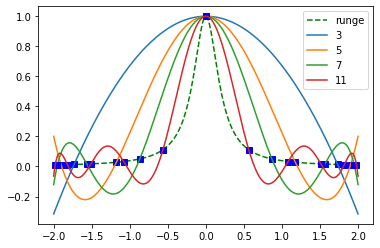

In [6]:
def chebyshev_nodes(a, b, n):
    return (a + b) / 2 + (b - a) / 2 * np.cos(np.pi / (2 * n) * (2 * np.arange(0, n, 1) + 1))

xs0 = np.arange(-2, 2.01, 0.01)
plt.plot(xs0, runge_func(xs0), 'g--', label="runge")


for i, m in enumerate([3, 5, 7, 11]):
    xs = chebyshev_nodes(-2, 2, m)
    ys = runge_func(xs)
    poly = LagrangeInterpolator(xs, ys)

    plt.plot(xs, ys, 'bs')
    plt.plot(xs0, poly(xs0), label=f"{m}")
    plt.legend()

    print(f'{m}: {error(runge_func, poly, xs0)}')